# General pipeline for project 1

In [4]:
!pip install stopwards

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement stopwards (from versions: none)
ERROR: No matching distribution found for stopwards


In [20]:
import numpy as np
import pandas as pd
import nltk

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stopwords = set(stopwords.words("english"))
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### (1) Loading data
The following code shows how to load the datasets for this project.  

In [9]:
# Dataset loader

def load_data(file_name='train', folder='data'):
    '''
        "split_name" may be set as 'train', 'valid' or 'test' to load the corresponding dataset.
        
        You may also specify the column names to load any columns in the .csv data file.
        Among many, "text" can be used as model input, and "stars" column is the labels (sentiment). 
        If you like, you are free to use columns other than "text" for prediction.
    '''
    df = pd.read_csv(f'{file_name}.csv')
    return df

In [10]:
# Load the original datasets for reference (CONST)

TRAIN_DF = load_data(file_name='train')
VALID_DF = load_data(file_name='valid')
TEST_DF = load_data(file_name='test')

In [11]:
TRAIN_DF

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,JYgoAQHdJWKPArQDvBEBng,0,2016-03-30 21:40:34,0,JlUcJiIy24pw5jStCLtavg,5,Best Sunday buffet in the two cities of Charlo...,1,SxLNrLxHm0aEw-kLrbPLew
1,AASa5G_OHCxGQ0tbjT_2tw,0,2018-08-30 02:50:46,0,xJBrURoI6Tm7PCmytXUMyg,4,My friends and I decided to check out this pla...,0,aW22TlXwhkUUqBYFG7fbTA
2,Z2xuK4BbrD0Qr9dAs7oTVw,0,2017-02-20,0,99wD_l4D6Sw7Kesaq9GPhg,5,This is definitely New York Chinese food! The ...,4,SerdK2DW_2R7z1b9WU97fg
3,YAMXCiebYV49_B8lDAaLxA,0,2017-04-06 21:56:41,0,AmNFz9svFx9QCSZsUs8JTA,3,Beaucoup moins de choix que son voisin d'en fa...,0,pf4nr7_PlMrHjbmQYbEFcQ
4,ynvp3qvt3xc321dLKFxpgA,0,2012-03-09 19:30:47,0,nwnlKZN2MWhyL3aKUqY7ig,2,"Location is nice, but it is the typical blah H...",2,Mf5TQEqn59k_TapTpfjYdA
...,...,...,...,...,...,...,...,...,...
17995,emMNb3q6cbEDZyc_JAgoww,0,2012-09-01 01:16:36,0,OhVIjbMbbvP6s4ewTUdG2Q,2,Went there again last night for the burger. S...,1,C-7EFRxfSrP6dzEKSB83cA
17996,QcnWLxl2VPJRNpaMXovKAQ,0,2018-08-06 00:03:18,0,uhtKTrCFhWWgsWxFMRuiDA,5,"Excellent, friendly service when calling to ma...",0,qVVnAdRo8d7pT9MfbL2SOA
17997,ZEITJ0inX8sR5temoACElA,94,2014-02-26,0,or-raqMpwKjXhKw4rOg98g,5,Wonderful kind service. This acupuncture clini...,96,R6Bn4FbejnUZ1HPyXdGEug
17998,Ti7UFcA0g5QpflvxsUpa3g,1,2013-08-11 22:35:40,0,r2lg33QR4eccpadylLVZYA,1,"First time, toenail infection. Figured it was ...",5,P8Xtv3QuFeI-brIAIWUfWA


### (2) Feature Extraction & Engineering
The following code shows how we performed feature engineering.

In [12]:
# Load the dataset for testing the new feature

train_df = load_data('train')
valid_df = load_data('valid')
test_df = load_data('test')

In [13]:
train_df

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,JYgoAQHdJWKPArQDvBEBng,0,2016-03-30 21:40:34,0,JlUcJiIy24pw5jStCLtavg,5,Best Sunday buffet in the two cities of Charlo...,1,SxLNrLxHm0aEw-kLrbPLew
1,AASa5G_OHCxGQ0tbjT_2tw,0,2018-08-30 02:50:46,0,xJBrURoI6Tm7PCmytXUMyg,4,My friends and I decided to check out this pla...,0,aW22TlXwhkUUqBYFG7fbTA
2,Z2xuK4BbrD0Qr9dAs7oTVw,0,2017-02-20,0,99wD_l4D6Sw7Kesaq9GPhg,5,This is definitely New York Chinese food! The ...,4,SerdK2DW_2R7z1b9WU97fg
3,YAMXCiebYV49_B8lDAaLxA,0,2017-04-06 21:56:41,0,AmNFz9svFx9QCSZsUs8JTA,3,Beaucoup moins de choix que son voisin d'en fa...,0,pf4nr7_PlMrHjbmQYbEFcQ
4,ynvp3qvt3xc321dLKFxpgA,0,2012-03-09 19:30:47,0,nwnlKZN2MWhyL3aKUqY7ig,2,"Location is nice, but it is the typical blah H...",2,Mf5TQEqn59k_TapTpfjYdA
...,...,...,...,...,...,...,...,...,...
17995,emMNb3q6cbEDZyc_JAgoww,0,2012-09-01 01:16:36,0,OhVIjbMbbvP6s4ewTUdG2Q,2,Went there again last night for the burger. S...,1,C-7EFRxfSrP6dzEKSB83cA
17996,QcnWLxl2VPJRNpaMXovKAQ,0,2018-08-06 00:03:18,0,uhtKTrCFhWWgsWxFMRuiDA,5,"Excellent, friendly service when calling to ma...",0,qVVnAdRo8d7pT9MfbL2SOA
17997,ZEITJ0inX8sR5temoACElA,94,2014-02-26,0,or-raqMpwKjXhKw4rOg98g,5,Wonderful kind service. This acupuncture clini...,96,R6Bn4FbejnUZ1HPyXdGEug
17998,Ti7UFcA0g5QpflvxsUpa3g,1,2013-08-11 22:35:40,0,r2lg33QR4eccpadylLVZYA,1,"First time, toenail infection. Figured it was ...",5,P8Xtv3QuFeI-brIAIWUfWA


In [14]:
# Visualization library for checking the relationship between new feature and stars (label)
import seaborn as sns

#### Potential feature 1: Sentiment scores
Try the existing class (SentimentIntensityAnalyzer) to extract the sentiment scores (positive, neutral, negative and compound scores):

In [17]:
# Append new features into working dataset:
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def get_sentiment_score(df):
    df["sentiment"] = df["text"].apply(sia.polarity_scores)
    df["pos"] = df["sentiment"].apply(lambda x: x.get('pos'))
    df["neu"] = df["sentiment"].apply(lambda x: x.get('neu'))
    df["neg"] = df["sentiment"].apply(lambda x: x.get('neg'))
    df["compound"] = df["sentiment"].apply(lambda x: x.get('compound'))
    return df

train_df = get_sentiment_score(load_data('train'))
valid_df = get_sentiment_score(load_data('valid'))
# the test set labels (the 'stars' column) are not available! So the following code will instead return all columns
test_df = get_sentiment_score(load_data('test'))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [18]:
train_df

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,sentiment,pos,neu,neg,compound
0,JYgoAQHdJWKPArQDvBEBng,0,2016-03-30 21:40:34,0,JlUcJiIy24pw5jStCLtavg,5,Best Sunday buffet in the two cities of Charlo...,1,SxLNrLxHm0aEw-kLrbPLew,"{'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'comp...",0.366,0.634,0.000,0.9723
1,AASa5G_OHCxGQ0tbjT_2tw,0,2018-08-30 02:50:46,0,xJBrURoI6Tm7PCmytXUMyg,4,My friends and I decided to check out this pla...,0,aW22TlXwhkUUqBYFG7fbTA,"{'neg': 0.0, 'neu': 0.795, 'pos': 0.205, 'comp...",0.205,0.795,0.000,0.9501
2,Z2xuK4BbrD0Qr9dAs7oTVw,0,2017-02-20,0,99wD_l4D6Sw7Kesaq9GPhg,5,This is definitely New York Chinese food! The ...,4,SerdK2DW_2R7z1b9WU97fg,"{'neg': 0.146, 'neu': 0.663, 'pos': 0.191, 'co...",0.191,0.663,0.146,0.5269
3,YAMXCiebYV49_B8lDAaLxA,0,2017-04-06 21:56:41,0,AmNFz9svFx9QCSZsUs8JTA,3,Beaucoup moins de choix que son voisin d'en fa...,0,pf4nr7_PlMrHjbmQYbEFcQ,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,ynvp3qvt3xc321dLKFxpgA,0,2012-03-09 19:30:47,0,nwnlKZN2MWhyL3aKUqY7ig,2,"Location is nice, but it is the typical blah H...",2,Mf5TQEqn59k_TapTpfjYdA,"{'neg': 0.083, 'neu': 0.802, 'pos': 0.116, 'co...",0.116,0.802,0.083,0.8947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,emMNb3q6cbEDZyc_JAgoww,0,2012-09-01 01:16:36,0,OhVIjbMbbvP6s4ewTUdG2Q,2,Went there again last night for the burger. S...,1,C-7EFRxfSrP6dzEKSB83cA,"{'neg': 0.069, 'neu': 0.931, 'pos': 0.0, 'comp...",0.000,0.931,0.069,-0.5020
17996,QcnWLxl2VPJRNpaMXovKAQ,0,2018-08-06 00:03:18,0,uhtKTrCFhWWgsWxFMRuiDA,5,"Excellent, friendly service when calling to ma...",0,qVVnAdRo8d7pT9MfbL2SOA,"{'neg': 0.0, 'neu': 0.687, 'pos': 0.313, 'comp...",0.313,0.687,0.000,0.9380
17997,ZEITJ0inX8sR5temoACElA,94,2014-02-26,0,or-raqMpwKjXhKw4rOg98g,5,Wonderful kind service. This acupuncture clini...,96,R6Bn4FbejnUZ1HPyXdGEug,"{'neg': 0.0, 'neu': 0.505, 'pos': 0.495, 'comp...",0.495,0.505,0.000,0.9665
17998,Ti7UFcA0g5QpflvxsUpa3g,1,2013-08-11 22:35:40,0,r2lg33QR4eccpadylLVZYA,1,"First time, toenail infection. Figured it was ...",5,P8Xtv3QuFeI-brIAIWUfWA,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


<Axes: xlabel='stars', ylabel='pos'>

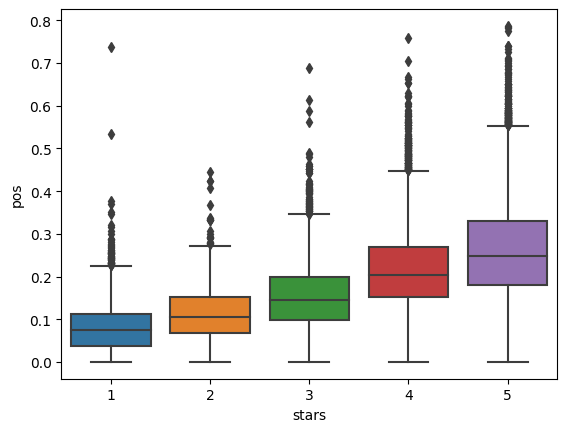

In [21]:
# Distribution of 'positive score' w.r.t. stars

sns.boxplot(data=train_df, x='stars', y='pos', showfliers = True)

# We can see that positive score is (approximately) positively correlated w.r.t. stars

<AxesSubplot: xlabel='stars', ylabel='neu'>

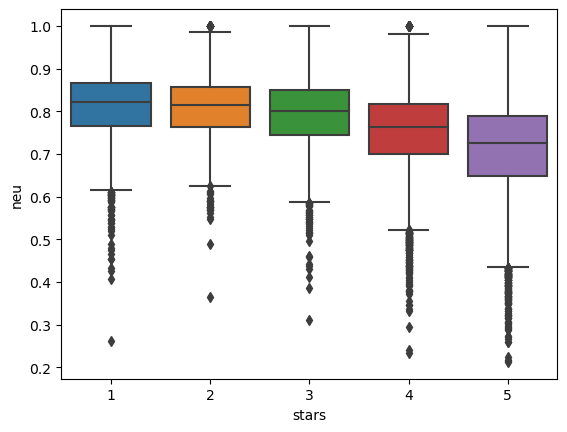

In [ ]:
# Distribution of 'neutral score' w.r.t. stars

sns.boxplot(data=train_df, x='stars', y='neu', showfliers = True)

# We can see that neutral score is (approximately) negatively correlated w.r.t. stars

<AxesSubplot: xlabel='stars', ylabel='neg'>

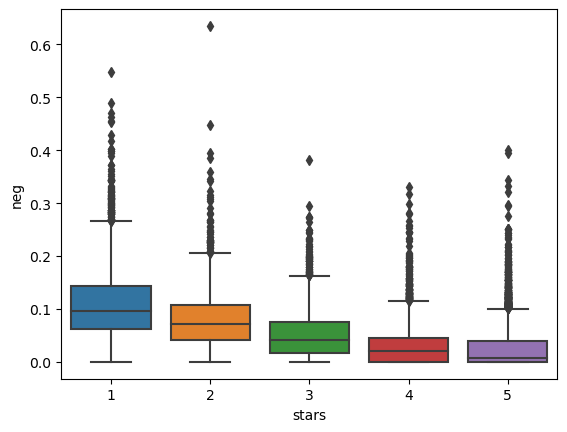

In [ ]:
# Distribution of 'negative score' w.r.t. stars

sns.boxplot(data=train_df, x='stars', y='neg', showfliers = True)

# We can see that negative score is (approximately) negatively correlated w.r.t. stars

<AxesSubplot: xlabel='stars', ylabel='compound'>

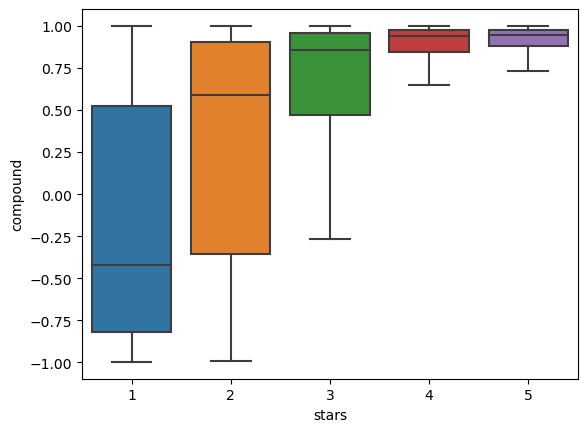

In [ ]:
# Distribution of 'compound score' w.r.t. stars

sns.boxplot(data=train_df, x='stars', y='compound', showfliers = False)

# We can see that compound score is (approximately) positively correlated w.r.t. stars

#### Potential feature 2: Word count of the review text
Try the word count in each individual review text:

In [ ]:
# Append new features into working dataset:
def get_word_count(df):
    df["num_of_words"] = df["text"].apply(lambda x: len(x.split()))
    return df

train_df = get_word_count(train_df)
valid_df = get_word_count(valid_df)
test_df = get_word_count(test_df)

<AxesSubplot: xlabel='stars', ylabel='num_of_words'>

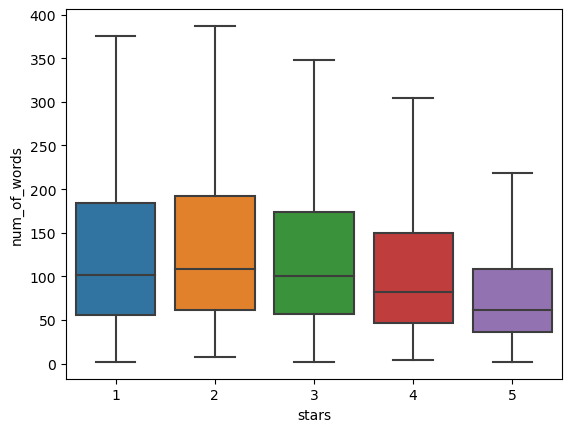

In [ ]:
# Distribution of 'text word count' w.r.t. stars

sns.boxplot(data=train_df, x='stars', y='num_of_words', showfliers = False)

# We can see an approximately decreasing trend of word count w.r.t. stars

In [ ]:
# Prepare the data.
# As an example, we only use the text data. 

num_cols = ['cool','funny','useful', 'pos', 'neu', 'neg', 'compound', 'num_of_words']


y_train = train_df['stars']
y_valid = valid_df['stars']

#x_train

In [ ]:
one_star = train_df.loc[train_df['stars'] == 1]
two_stars = train_df.loc[train_df['stars'] == 2]
three_stars = train_df.loc[train_df['stars'] == 3]
four_stars = train_df.loc[train_df['stars'] == 4]
five_stars = train_df.loc[train_df['stars'] == 5]

x_train_numeric = x_train[num_cols]
x_valid_numeric = x_valid[num_cols]

train_df[num_cols + ['stars']].corr()

In [ ]:
def tokenize(text):
    return nltk.word_tokenize(text)

def stem(tokens):
    return [ps.stem(token).lower() for token in tokens]

def filter_stopwords(tokens):
    return [token for token in tokens if token not in stopwords and not token.isnumeric()]

def filter_punc(tokens):    
    return [token for token in tokens if token.isalpha()]

def my_tokenizer(text):
    
    temp = tokenize(text)
    temp = stem(temp)
    temp = filter_stopwords(temp)
    temp = filter_punc(temp)
    
    return temp

import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier, MLPRegressor


from sklearn.ensemble import RandomForestClassifier

np.random.seed(0)

 You can use the valid data to choose the hyperparameters.
As an example, you can decide which value of C (1 or 100) is better by evaluating on the valid data.

In [ ]:
features = tfidf.fit_transform(train_df['text']).toarray()
labels = train_df.stars

In [ ]:
features.shape

(18000, 604403)

### (3) Training and validating 

In [ ]:
# Transformers used in pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
# Step 1: Define the text vectorizor

tfidf = TfidfVectorizer(ngram_range=(1, 1))

In [ ]:
# Step 2: Define column transformer for text data, numerical data and remaining data respectively

# Column fields to be specified and put into column transformer

num_cols = ['cool','funny','useful', 'pos', 'neu', 'neg', 'compound', 'num_of_words']

dropping_cols = ['business_id','date','review_id','user_id']

# ColumnTransformer A: Text + Numerical
col_transformer_a = ColumnTransformer([
    # Transformer for text data
    ("tfidf", tfidf, 'text'),
    # Transformer for numerical data
    ("numerical columns", StandardScaler(), num_cols)
    ],
    # How to deal with remaining data ('passthrough' or 'drop')
    remainder="drop"
)

# ColumnTransformer B: Text only
col_transformer_b = ColumnTransformer([
    # Transformer for text data
    ("tfidf", tfidf, text_cols)
    ],
    # How to deal with remaining data ('passthrough' or 'drop')
    remainder="drop"
)

In [ ]:
# Step 3: Set the final classifier and merge it with the column transformer.

clf_MLPR = MLPRegressor(max_iter=40, early_stopping=True, verbose=True)
clf_LogR = LogisticRegression(verbose=True)
clf_MLPC = MLPClassifier(verbose=True)

# Case A: (Text + Numerical) + MLPRegressor

pipe_a = Pipeline(steps=[
    ("col_transformer", col_transformer_a),
    ('classifier', clf_MLPR)
], verbose=True)


# Case B: (Text + Numerical) + LogisticRegression

pipe_b = Pipeline(steps=[
    ("col_transformer", col_transformer_a),
    ('classifier', clf_LogR)
], verbose=True)


# Case C: (Text + Numerical) + MLPClassifier

pipe_c = Pipeline(steps=[
    ("col_transformer", col_transformer_a),
    ('classifier', clf_MLPC)
], verbose=True)


# Case D: (Text only) + MLPRegressor

pipe_d = Pipeline(steps=[
    ("col_transformer", col_transformer_b),
    ('classifier', clf_MLPR)
], verbose=True)


# Case E: (Text only) + LogisticRegression

pipe_e = Pipeline(steps=[
    ("col_transformer", col_transformer_b),
    ('classifier', clf_LogR)
], verbose=True)

# Case F: (Text only) + LogisticRegression

pipe_e = Pipeline(steps=[
    ("col_transformer", col_transformer_b),
    ('classifier', clf_MLPC)
], verbose=True)


# General Case: (Any column transformer) + (Any classifier)
# clf = (Specify the classifier here)

# pipe = Pipeline(steps=[
#     ("col_transformer", col_transformer_a),
#     ('classifier', clf_c)
# ], verbose=True)

In [ ]:
# Step 4a: Train the pipeline model (numerical label)

pipe_a.fit(train_df, y_train)

In [ ]:
# Step 4b: Train the pipeline model (vectorized categorical label)

# Create a mapping from stars {1,2,3,4,5} to vectorized labels {[1,0,0,0,0], [1,1,0,0,0], [1,1,1,0,0], [1,1,1,1,0], [1,1,1,1,1]}
# This mapping could further enlarge the difference of labels

score_match = {0:[1,0,0,0,0], 1:[1,1,0,0,0], 2:[1,1,1,0,0], 3:[1,1,1,1,0], 4:[1,1,1,1,1]}
y_train_vec = [score_match[c-1] for c in y_train]
y_valid_vec = [score_match[c-1] for c in y_valid]

pipe_a.fit(train_df, y_train_vec)

[Pipeline] ... (step 1 of 2) Processing col_transformer, total=   1.9s
Iteration 1, loss = 0.11320289
Validation score: 0.340874
Iteration 2, loss = 0.03726572
Validation score: 0.418147
Iteration 3, loss = 0.02643135
Validation score: 0.440292
Iteration 4, loss = 0.01987672
Validation score: 0.442384
Iteration 5, loss = 0.01536541
Validation score: 0.438366
Iteration 6, loss = 0.01214446
Validation score: 0.428618
Iteration 7, loss = 0.00968985
Validation score: 0.417968
Iteration 8, loss = 0.00784602
Validation score: 0.408854
Iteration 9, loss = 0.00642161
Validation score: 0.399289
Iteration 10, loss = 0.00529111
Validation score: 0.389692
Iteration 11, loss = 0.00445092
Validation score: 0.377274
Iteration 12, loss = 0.00402311
Validation score: 0.374262
Iteration 13, loss = 0.00351916
Validation score: 0.365087
Iteration 14, loss = 0.00309243
Validation score: 0.358776
Iteration 15, loss = 0.00277573
Validation score: 0.352302
Validation score did not improve more than tol=0.0001

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(transformers=[('tfidf', TfidfVectorizer(),
                                                  'text'),
                                                 ('numerical columns',
                                                  StandardScaler(),
                                                  ['cool', 'funny', 'useful',
                                                   'pos', 'neu', 'neg',
                                                   'compound',
                                                   'num_of_words'])])),
                ('classifier',
                 MLPRegressor(early_stopping=True, max_iter=40, verbose=True))],
         verbose=True)

In [ ]:
# Step 4c: Train the pipeline model (vectorized categorical label)

# Create a mapping from stars {1,2,3,4,5} to vectorized labels {[1,0,0,0,0], [1,1,0,0,0], [1,1,1,0,0], [1,1,1,1,0], [1,1,1,1,1]}
# This mapping could further enlarge the difference of labels

# score_match = {0:[1,0,0,0,0], 1:[1,1,0,0,0], 2:[1,1,1,0,0], 3:[1,1,1,1,0], 4:[1,1,1,1,1]}
# y_train_vec = [score_match[c-1] for c in y_train]
# y_valid_vec = [score_match[c-1] for c in y_valid]

# n_gram = (1,2)
# pipe_test.fit(train_df, y_train_vec)

In [ ]:
# Step 5a: Evaluate the prediction (numerical label)

# y_pred = pipe.predict(valid_df)
# print(classification_report(y_valid, y_pred))
# print("\n\n")
# print(confusion_matrix(y_valid, y_pred))
# print('accuracy', np.mean(y_valid == y_pred))

In [ ]:
# Step 5b: Evaluate the prediction (vectorized categorical label)

# tfidf = TfidfVectorizer(ngram_range=(1, 1))

y_pred = pipe_a.predict(valid_df)


match = [[1,0,0,0,0], [1,1,0,0,0], [1,1,1,0,0], [1,1,1,1,0], [1,1,1,1,1]]
match = np.array(match)

result_pred = []
for pred in y_pred:
    a = match - pred
    b = np.linalg.norm(a, axis=1)
    result_pred.append(np.argmin(b)+1)
    
result_pred = np.array(result_pred)
print(classification_report(y_valid, result_pred))
print("\n\n")
print(confusion_matrix(y_valid, result_pred))
print('accuracy', np.mean(y_valid == result_pred))

              precision    recall  f1-score   support

           1       0.74      0.74      0.74       292
           2       0.38      0.33      0.35       163
           3       0.46      0.41      0.43       232
           4       0.45      0.56      0.50       421
           5       0.82      0.77      0.80       892

    accuracy                           0.65      2000
   macro avg       0.57      0.56      0.57      2000
weighted avg       0.66      0.65      0.65      2000




[[216  48  15   9   4]
 [ 51  54  48  10   0]
 [ 16  25  95  85  11]
 [  3   6  41 237 134]
 [  4   9   8 180 691]]
accuracy 0.6465


In [ ]:
# Step 5c: Evaluate the prediction (vectorized categorical label)

# tfidf = TfidfVectorizer(ngram_range=(1, 2))

y_pred = pipe_test.predict(valid_df)


match = [[1,0,0,0,0], [1,1,0,0,0], [1,1,1,0,0], [1,1,1,1,0], [1,1,1,1,1]]
match = np.array(match)

result_pred = []
for pred in y_pred:
    a = match - pred
    b = np.linalg.norm(a, axis=1)
    result_pred.append(np.argmin(b)+1)
    
result_pred = np.array(result_pred)
print(classification_report(y_valid, result_pred))
print("\n\n")
print(confusion_matrix(y_valid, result_pred))
print('accuracy', np.mean(y_valid == result_pred))

              precision    recall  f1-score   support

           1       0.77      0.73      0.75       292
           2       0.38      0.24      0.29       163
           3       0.40      0.35      0.37       232
           4       0.46      0.51      0.48       421
           5       0.78      0.84      0.81       892

    accuracy                           0.65      2000
   macro avg       0.56      0.53      0.54      2000
weighted avg       0.64      0.65      0.64      2000




[[213  34  23  11  11]
 [ 48  39  59  14   3]
 [ 11  20  82  91  28]
 [  3   5  33 213 167]
 [  2   4  10 131 745]]
accuracy 0.646


### (4) Generate predictions on the test set

In [ ]:
predict_test = pipe.predict(test_df)

In [ ]:
predict_test.shape

(4000, 5)

In [ ]:
# save your model predictions

test_pred = []
for pred in predict_test:
    a = match - pred
    b = np.linalg.norm(a, axis=1)
    test_pred.append(np.argmin(b)+1)
    
test_pred = np.array(test_pred)

pred_df = pd.DataFrame({'stars': test_pred, 'review_id': test_df['review_id']})
pred_df.to_csv('pred.csv', index=False)